# Q3 c)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Making a model using the Xception NN

In [ ]:
xception = Xception(weights='imagenet', include_top=False, input_shape=(71, 71, 3))
x = xception.output
x = GlobalAveragePooling2D()(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=xception.input, outputs=predictions)

for layer in xception.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Loading and preprocessing dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


def preprocess_image(image, label):
    image = tf.image.resize(image, (71, 71))
    image = preprocess_input(image)
    return image, label


train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_ds = train_ds.shuffle(buffer_size=5000).batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
print(train_ds)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 71, 71, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))>


In [ ]:
h = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
1563/1563 [==============================] - 1305s 834ms/step - loss: 0.8511 - accuracy: 0.7186 - val_loss: 0.8158 - val_accuracy: 0.7271
Epoch 2/10
1563/1563 [==============================] - 1253s 801ms/step - loss: 0.7129 - accuracy: 0.7569 - val_loss: 0.7887 - val_accuracy: 0.7374
Epoch 3/10
1563/1563 [==============================] - 1218s 779ms/step - loss: 0.6527 - accuracy: 0.7754 - val_loss: 0.7786 - val_accuracy: 0.7410
Epoch 4/10
1563/1563 [==============================] - 1221s 781ms/step - loss: 0.6094 - accuracy: 0.7876 - val_loss: 0.7866 - val_accuracy: 0.7420
Epoch 5/10
1563/1563 [==============================] - 1221s 781ms/step - loss: 0.5720 - accuracy: 0.8017 - val_loss: 0.8034 - val_accuracy: 0.7386
Epoch 6/10
1563/1563 [==============================] - 1220s 780ms/step - loss: 0.5379 - accuracy: 0.8106 - val_loss: 0.8060 - val_accuracy: 0.7391
Epoch 7/10
1563/1563 [==============================] - 1223s 782ms/step - loss: 0.5058 - accuracy: 0.8214

# Plotting the results

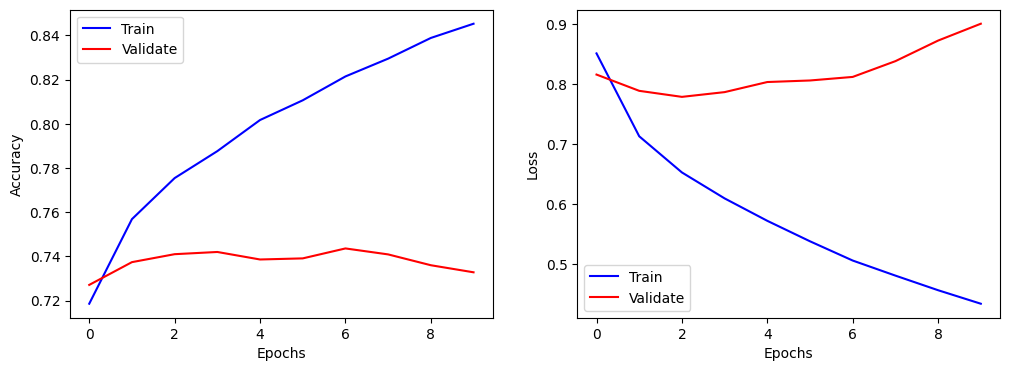

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], label='Train', color='blue')
plt.plot(h.history['val_accuracy'], label='Validate', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], label='Train', color='blue')
plt.plot(h.history['val_loss'], label='Validate', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Q3 d)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

# Making a model using the VGG16 NN and making the last block of it trainable

In [3]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
i = 0
for layer in vgg16.layers:
    if i > 14:
        layer.trainable = True
        # print(i)
    else:
        layer.trainable = False
    i+=1

x = vgg16.output
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16.input, outputs=x)


model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

# Loading and preprocessing dataset

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
h = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 2324s 6s/step - loss: 1.2755 - accuracy: 0.5485 - val_loss: 0.8957 - val_accuracy: 0.6908
Epoch 2/10
391/391 [==============================] - 2344s 6s/step - loss: 0.8202 - accuracy: 0.7196 - val_loss: 0.8257 - val_accuracy: 0.7167
Epoch 3/10
391/391 [==============================] - 2361s 6s/step - loss: 0.6973 - accuracy: 0.7573 - val_loss: 0.7742 - val_accuracy: 0.7353
Epoch 4/10
391/391 [==============================] - 2358s 6s/step - loss: 0.6107 - accuracy: 0.7860 - val_loss: 0.7953 - val_accuracy: 0.7340
Epoch 5/10
391/391 [==============================] - 2325s 6s/step - loss: 0.5377 - accuracy: 0.8124 - val_loss: 0.7595 - val_accuracy: 0.7387
Epoch 6/10
391/391 [==============================] - 2344s 6s/step - loss: 0.4652 - accuracy: 0.8368 - val_loss: 0.8252 - val_accuracy: 0.7430
Epoch 7/10
391/391 [==============================] - 2337s 6s/step - loss: 0.3998 - accuracy: 0.8578 - val_loss: 0.8299 - val_accuracy:

# Plotting the results

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(h.history['accuracy'], label='Train', color='blue')
plt.plot(h.history['val_accuracy'], label='Validate', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(h.history['loss'], label='Train', color='blue')
plt.plot(h.history['val_loss'], label='Validate', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()